In [1]:
import pandas as pd
import numpy as np



In [2]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [3]:
! python -m spacy download 'en_core_web_sm'

     |████████████████████████████████| 13.9 MB 2.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
df=pd.read_excel("@F1-2.xlsx",header=[1])




In [18]:
df.columns

Index(['Vertex 1', 'Vertex 2', 'Color', 'Width', 'Style', 'Opacity',
       'Visibility', 'Label', 'Label Text Color', 'Label Font Size',
       'Reciprocated?', 'ID', 'Dynamic Filter', 'Add Your Own Columns Here',
       'Relationship', 'Relationship Date (UTC)', 'Tweet', 'URLs in Tweet',
       'Domains in Tweet', 'Hashtags in Tweet', 'Media in Tweet',
       'Tweet Image File', 'Tweet Date (UTC)', 'Date', 'Time',
       'Twitter Page for Tweet', 'Latitude', 'Longitude', 'Imported ID',
       'In-Reply-To Tweet ID', 'Favorited', 'Favorite Count',
       'In-Reply-To User ID', 'Is Quote Status', 'Language',
       'Possibly Sensitive', 'Quoted Status ID', 'Retweeted', 'Retweet Count',
       'Retweet ID', 'Source', 'Truncated', 'Unified Twitter ID',
       'Imported Tweet Type', 'Added By Extended Analysis',
       'Corrected By Extended Analysis', 'Place Bounding Box', 'Place Country',
       'Place Country Code', 'Place Full Name', 'Place ID', 'Place Name',
       'Place Type', 'Pla

In [19]:
df['Tweet'].value_counts()[:10]

Ready to up the ante in 2023 🤩\n\n#F1 @Vegas @WynnLasVegas @MGMResortsIntl @CaesarsEnt https://t.co/rRbxJvPsgu                                                                                                                                   2534
BREAKING: F1 to host night race in Las Vegas from 2023!\n\n#F1 @Vegas https://t.co/jtXbzKioV4                                                                                                                                                    2071
TEAM UPDATE: We are pleased to confirm that Sebastian Vettel is now fit to race and will therefore line up alongside @lance_stroll in Melbourne to kick off his 2022 @F1 season at the @ausgrandprix. 💚\n\n#F1 #AusGP https://t.co/LrFqaHyQ8W    1807
How 'bout that ride in? I guess that's why they call it Sin City.\n\n@F1 is going to Vegas! 🤩 https://t.co/vZ6AvQcclE                                                                                                                            1447
I always wanted 

In [20]:
df['Tweet'].nunique()

3980

In [32]:
type(df['Tweet'].unique())

numpy.ndarray

In [21]:
l=[]
for i in df['Tweet'].unique():
    l.append(i)
   

In [22]:
import spacy

In [23]:
nlp = spacy.load("en_core_web_sm")

In [24]:
def data_cleaner(row):
    doc = nlp(row)
    output = [(token.lemma_).lower() for token in doc if token.is_stop == False and token.is_alpha==True]
    return output

In [9]:
df['Cleaned'] = df['Tweet'].apply(lambda x: data_cleaner(x))

In [25]:
df1=pd.DataFrame(l)
df1[0]=df1[0].apply(lambda x: data_cleaner(x))

In [26]:
df1[0]

0       [great, instead, reactivate, real, race, track...
1                   [year, graphic, visual, terrible, go]
2                                                      []
3       [para, diseñar, el, circuito, urbano, en, las,...
4                                           [ready, ante]
                              ...                        
3975                                                   []
3976                                                   []
3977    [worry, game, suppose, come, summer, single, s...
3978                                                   []
3979                              [new, vegas, residency]
Name: 0, Length: 3980, dtype: object

In [27]:
with open('F1Unique.txt', 'w') as filehandle:
    for li in df1[0]:
        for i in li:
            
            filehandle.write('%s' % i +' ')

In [50]:
np.savetxt('AstonMartinSuniquewords.txt',np.unique(df['Cleaned']))

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [10]:
df['Cleaned'] 

0        [hulkenberg, seguirá, pilotando, para, en, ara...
1        [hulkenberg, seguirá, pilotando, para, en, ara...
2        [detalle, de, los, radiadore, del, casi, horiz...
3        [detalle, de, los, radiadore, del, casi, horiz...
4                                           [free, vettel]
                               ...                        
24763                                        [thank, luca]
24764                 [hey, finally, bucket, hat, deserve]
24765                                  [bucket, hat, wear]
24766                                       [problem, rie]
24767                                       [kill, meeeee]
Name: Cleaned, Length: 24768, dtype: object

In [11]:
df.Cleaned.to_csv('cleanAMD.csv')

In [12]:
!pip install langdetect
from langdetect import detect, detect_langs

def language_detection(text, method = "single"):
    if(method.lower() != "single"):
        result = detect_langs(text)
    else:
        result = detect(text)
    return result

In [13]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

In [14]:
df['Lang'] = df['Tweet'].apply(det)

In [15]:
df['Lang'].value_counts()

en       18292
es        1771
sv         795
da         768
it         571
de         479
pt         300
fr         262
id         243
et         215
nl         169
ja         138
tr         124
ar         121
af         101
Other       91
no          70
ro          56
tl          37
pl          31
ca          31
so          27
fi          24
sl          11
vi           6
ko           6
cy           4
hu           4
ru           4
lt           3
sw           3
th           2
sq           2
el           2
uk           2
fa           1
hr           1
cs           1
Name: Lang, dtype: int64

In [16]:
df['CLEANED_EN']=df['Cleaned'][df['Lang']=='en']


In [74]:
df['eng_tweets']=df['Tweet'][df['Lang']=='en']

In [76]:
df['eng_tweets'].nunique()

3503

In [86]:
df['eng_tweets'].unique()

array(['Hulkenberg seguirá pilotando para @AstonMartinF1 en Arabia Saudi. Vettel no ha dado negativo aún en Covid19. \n\nHulkenberg will drive for Aston Martin again in #SaudiArabianGP. Vettel has not tested negative yet.\n#F12022',
       nan,
       '5️⃣ days until we welcome an exclusive group of senior finance and commercial leadership to the 2022 Finance in Sport Forum.\n\nSpeakers including 👉🏼 @KieranMaguire, @AstonMartinF1, @ASRomaEN, @Globalblocknews, @WesternUnion 🙌🏽\n\nLooking forward to seeing everyone after two years! https://t.co/5raKW591OO',
       ..., '@soziluca_sv5 @AstonMartinF1 Thanks Luca!',
       'Hey @AstonMartinF1 give @High5Forever and all of us finally the bucket hat! She deserves it so much! 💚✨',
       '@High5Forever @AstonMartinF1 No problem Rie!'], dtype=object)

In [91]:
l1=[]
for i in df['eng_tweets'].unique():
    l1.append(str(i))

In [111]:
l1

['Hulkenberg seguirá pilotando para @AstonMartinF1 en Arabia Saudi. Vettel no ha dado negativo aún en Covid19. \n\nHulkenberg will drive for Aston Martin again in #SaudiArabianGP. Vettel has not tested negative yet.\n#F12022',
 'nan',
 '5️⃣ days until we welcome an exclusive group of senior finance and commercial leadership to the 2022 Finance in Sport Forum.\n\nSpeakers including 👉🏼 @KieranMaguire, @AstonMartinF1, @ASRomaEN, @Globalblocknews, @WesternUnion 🙌🏽\n\nLooking forward to seeing everyone after two years! https://t.co/5raKW591OO',
 '@AstonMartinF1 Wishing a speedy recovery for the sherlock',
 '@AstonMartinF1 Q2 possible or as usual exit in Q1??',
 'FREE HIM https://t.co/1vy8N5GbVG',
 '@AstonMartinF1 Will she ever take her bucket hat off? 😂😂',
 '@AstonMartinF1 All I want right now is his return.',
 "BREAKING: @AstonMartinF1's Sebastian Vettel has tested positive for Covid-19 and will be replaced by Nico Hulkenberg at the Bahrain Grand Prix\n\n#BahrainGP #F1 https://t.co/9ybXDnl

In [92]:
df2=pd.DataFrame(l1)


In [93]:
df2[0]=df2[0].apply(lambda x: data_cleaner(x))

In [94]:
with open('AstonMartinSUnique_eng.txt', 'w') as filehandle:
    for li in df2[0]:
        for i in li:
            
            filehandle.write('%s' % i +' ')

In [95]:
pip install wordcloud

     |████████████████████████████████| 220 kB 1.9 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158428 sha256=26dd713f11db4b1595fc8f51a0d2d7226d748de9b96dcad5cb4e084b315cf55f
  Stored in directory: /Users/vennelamuvva/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [28]:
import wordcloud as wc
import matplotlib.pyplot as plt

In [100]:
file_text = open("AstonMartinSUnique_eng.txt", "r")
text="".join(word for word in file_text)
print(text)

SyntaxError: invalid syntax (<ipython-input-100-53f3fa2b9328>, line 1)

In [98]:
wordcloud = wc.WordCloud().generate(text)


In [29]:
file_text = open("F1Unique.txt", "r")
text="".join(word for word in file_text)

In [30]:
wordcloud = wc.WordCloud().generate(text)

In [31]:
wordcloud = wc.WordCloud(background_color ='white',
                         width=1600,height=900,
                         min_font_size = 5,
                         max_words=500).generate(text)

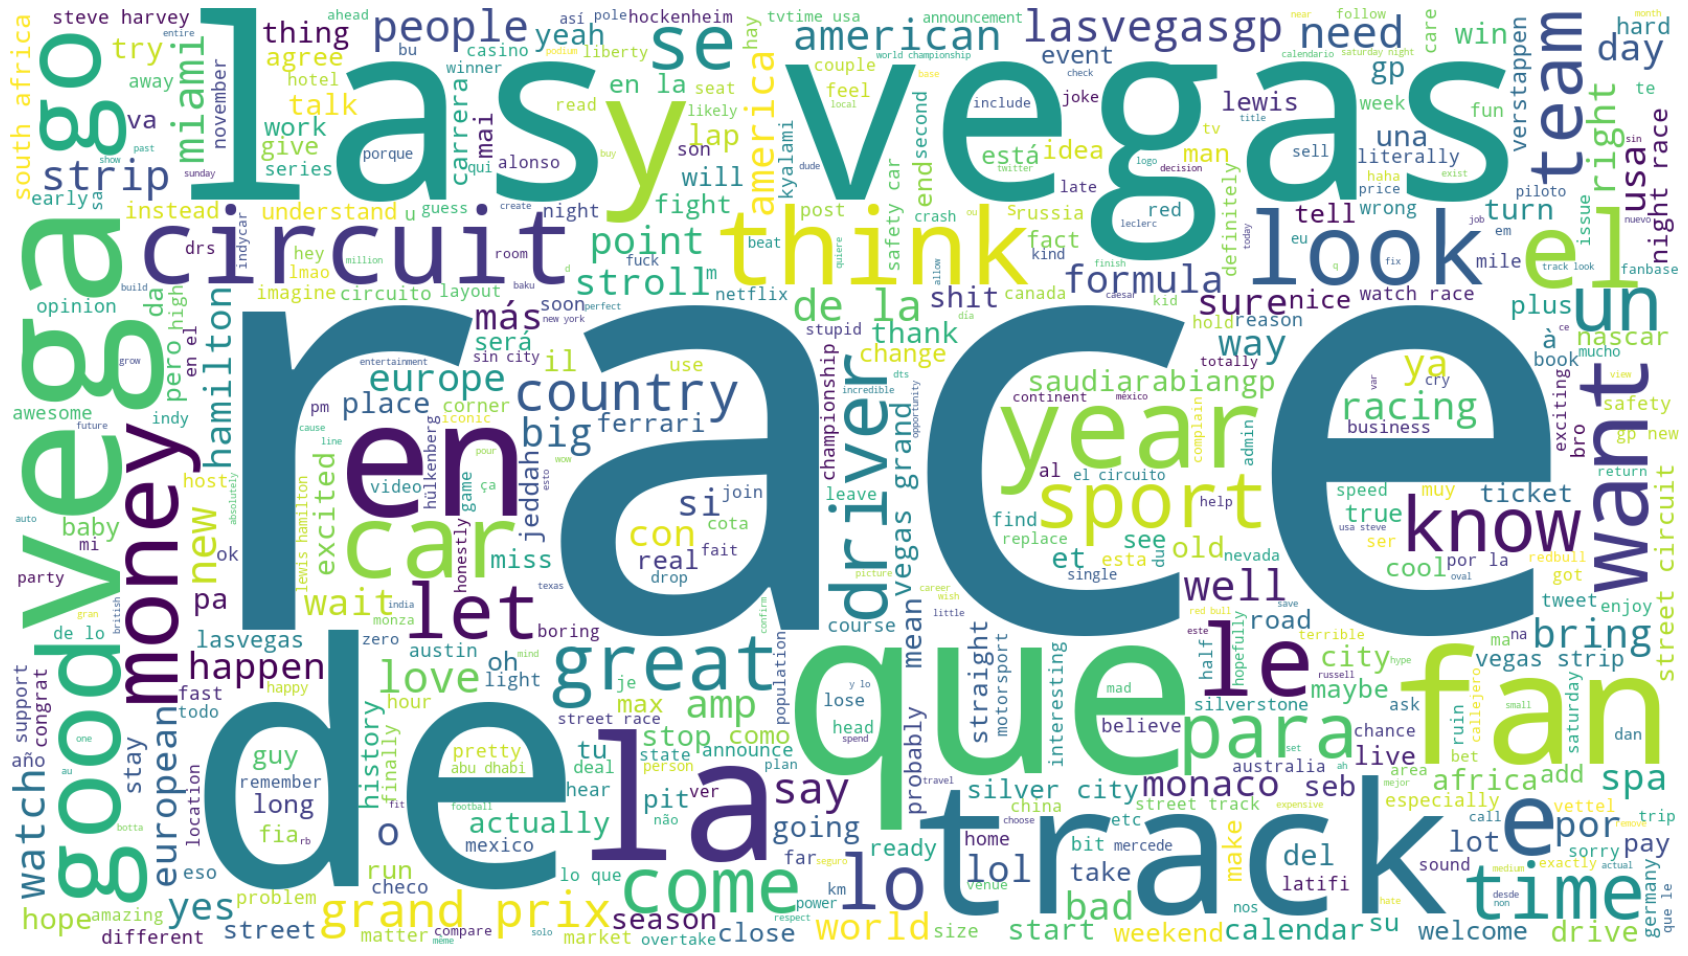

In [32]:
plt.figure(figsize = (30, 30), facecolor=None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [104]:
wordcloud = wc.WordCloud(background_color ='white',
                         width=1600,height=900,
                         min_font_size = 5,
                         max_words=100).generate(text)

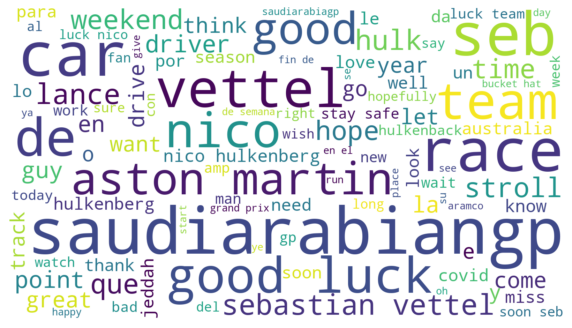

In [105]:
plt.figure(figsize = (10, 10), facecolor=None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()